In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


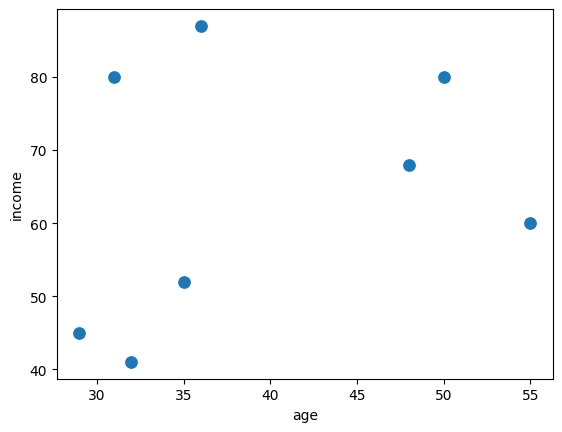

In [5]:
sns.scatterplot(df, x='age', y='income', s=100)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
hc.fit(df[['age','income']])

AgglomerativeClustering(n_clusters=3)

In [61]:
hc.labels_

array([1, 0, 1, 1, 2, 0, 2, 0])

In [62]:
df["clusters"]=hc.labels_

In [63]:
df

,name,age,income,clusters
0,Rob,29,45,1
1,Andrea,50,80,0
2,Mohan,35,52,1
3,Michael,32,41,1
4,Kory,36,87,2
5,David,48,68,0
6,Ismail,31,80,2
7,Sheela,55,60,0


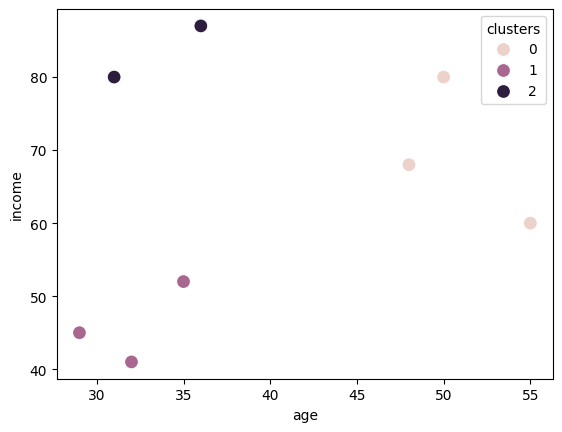

In [64]:
sns.scatterplot(df, x='age', y='income', s=100,hue='clusters')
plt.show()

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df[['age', 'income']]
Z = linkage(X, method='average')
Z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

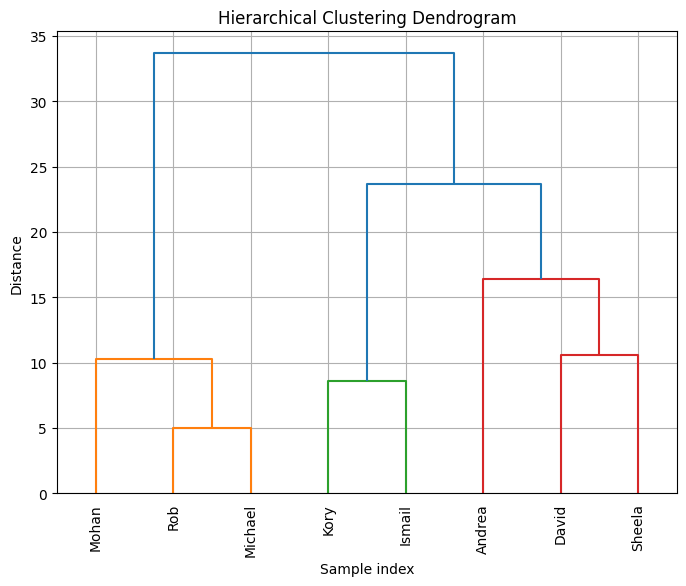

In [47]:
# Plotting the dendrogram
plt.figure(figsize=(8,6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=df['name'].values, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [53]:
result = fcluster(Z,t=3,criterion='maxclust')

In [54]:
result

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)